In [49]:
import numpy as np
import os
from myutils import Datasets as ds
import pandas as pd
from myutils import Helpers as h
from myutils import Complexity_Measures as cm

#Magic Command, so changes in myutils module are reloaded
%load_ext autoreload
%autoreload 1
%aimport myutils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
data = ds.get_preprocessed_datasets()

dfs = list()

for preprocessing in data:
    result = dict()

    if preprocessing != "RAW":

        for dataset in data[preprocessing]:
            x_train = data[preprocessing][dataset]['x_train']
            y_train = data[preprocessing][dataset]['y_train']
            x_test = data[preprocessing][dataset]['x_test']
            y_test = data[preprocessing][dataset]['y_test']

            x = np.concatenate((x_train, x_test), axis=0)
            y = np.concatenate((y_train, y_test), axis=0)
        
            fischer = cm.fischer_discriminat_ratio(x, y)
            max_fischer = 1 / (1+ np.amax(fischer))
            result[dataset] = max_fischer
        df = pd.DataFrame.from_dict(result, orient='index')
        df.columns = [preprocessing]
        dfs.append(df)

df = pd.concat(dfs,axis=1).sort_index()
df["Diff"] = abs(df["PCA"]-df["Autoencoder"])
#Total sum per row: 
df.loc['Total Mean',:] = df.mean(axis=0)
df

,PCA,Autoencoder,Diff
"0,1",0.057234,0.754133,0.696899
"0,2",0.143830,0.407335,0.263504
"0,3",0.142892,0.345170,0.202278
"0,4",0.107911,NaN,NaN
Total Mean,0.112967,0.502213,0.387560


reshape_shape (12665, 2, 2)


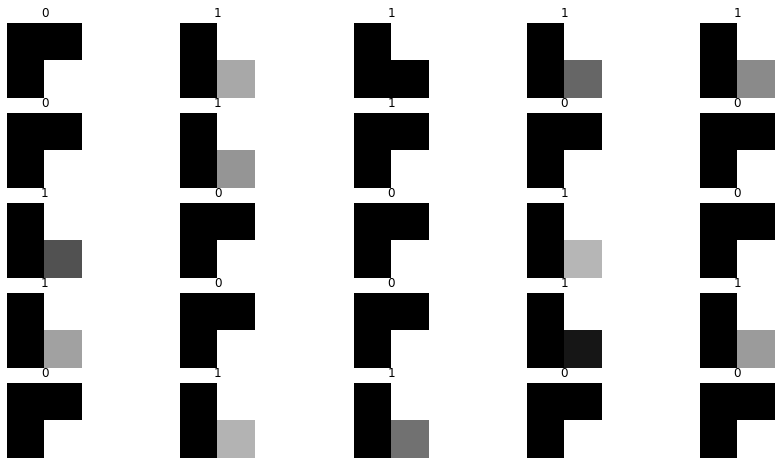

In [41]:
h.plot_grid(h.reshape(data["Autoencoder"]["0,1"]["x_train"],(2,2)),data["Autoencoder"]["0,1"]["y_train"],rows=5)

reshape_shape (12665, 2, 2)


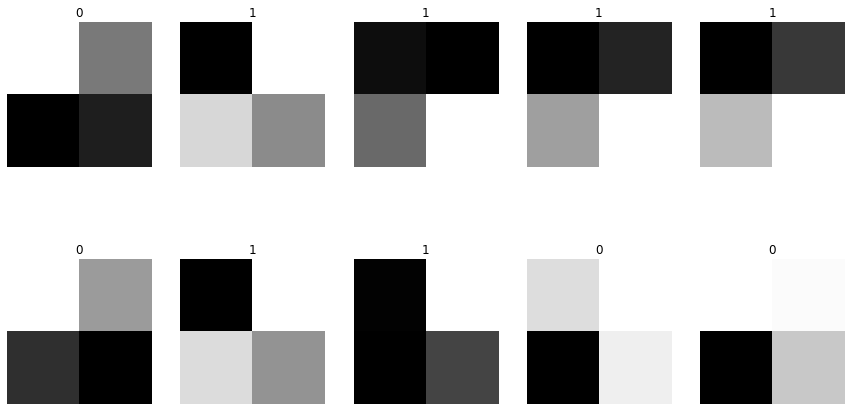

In [56]:
h.plot_grid(h.reshape(data["PCA"]["0,1"]["x_train"],(2,2)),data["PCA"]["0,1"]["y_train"])